# Zoo Animal Classifier

## Introduction

In this project we aim to create the most accurate multivariate classifier for 101 species of zoo animals. Throughout this project, we will follow the OSEMN (Obtain, Scrub, Explore, Model, aNalyze) data science framework. Our objectives consist of answering the following questions:

- What is the overall class composition of all the zoo animals?
- How do different models perform with regards to the greatest accuracy of class classification?
- What features most significantly influence classification of these animals?

## Obtaining the Data

First, we import all the necessary packages for initial data scrubbing and exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We upload the data set from our csv file, obtained from <a href="https://www.kaggle.com/uciml/zoo-animal-classification">Kaggle</a>.

In [2]:
zoo_data = pd.read_csv('zoo-animal-classification/zoo.csv')
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Scrubbing the Data

Based on the following cells, we observe that 101 total animals exist in our dataset. In our second dataframe, we see seven different classes of animal species, with the majority of animals classified as mammals or birds. No null values exist across the 16 other features, which are all binarily classified.

In [3]:
len(zoo_data)

101

In [4]:
class_data = pd.read_csv('zoo-animal-classification/class.csv')
class_data

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [5]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo_data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

## Exploring the Data

As illustrated by the correlation heatmap below, most features are independent of and not well correlated to each other. However, eggs appear to be highly negatively correlated to both hair and milk, while hair and milk are highly positively correlated with one another. Given the chaarateristics of each class (particularly mammals, when compared to birds, reptiles and amphibians), these correlations make sense and will appear in our analysis of most significant modeling features later on.

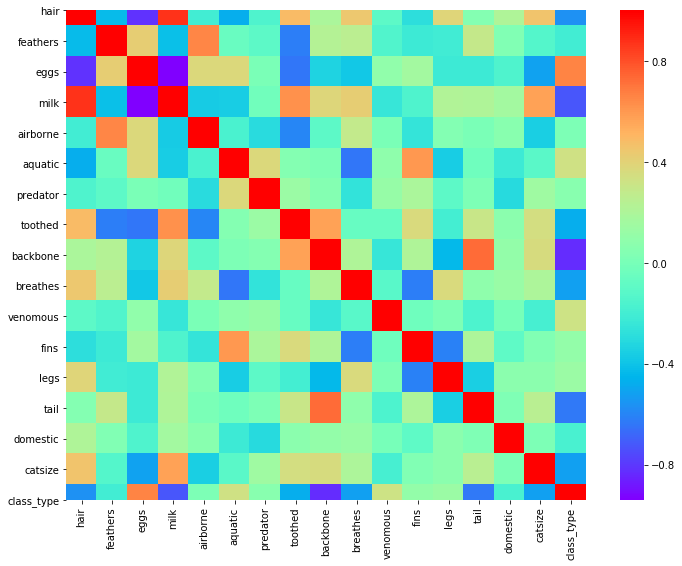

In [7]:
corrmat = zoo_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

Text(0.5, 1.0, 'Number of Species per Class Type')

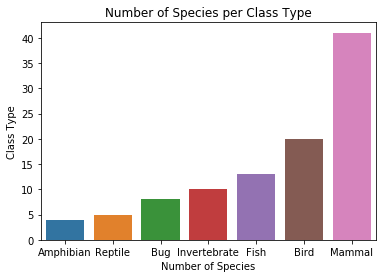

In [8]:
class_data.sort_values('Number_Of_Animal_Species_In_Class',ascending=True,inplace=True)
sns.barplot(class_data['Class_Type'],class_data['Number_Of_Animal_Species_In_Class'])
plt.xlabel('Number of Species')
plt.ylabel('Class Type')
plt.title('Number of Species per Class Type')

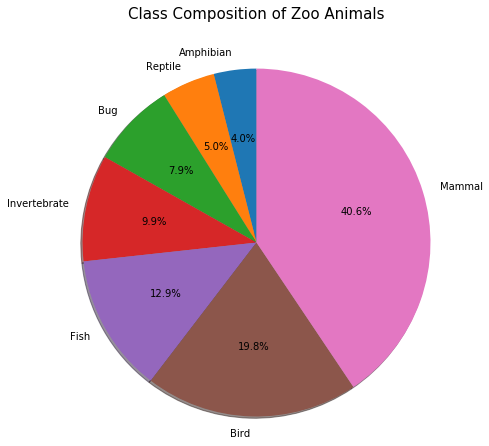

In [9]:
plt.pie(class_data.Number_Of_Animal_Species_In_Class,
        labels=class_data.Class_Type, autopct='%1.1f%%', shadow=True, startangle=90, radius=2)
plt.title('Class Composition of Zoo Animals', y=1.5, size=15)
plt.show()

Based on the two charts above, we see that mammals comprise the largest percentage of all species at the zoo, with only half as many birds, and approximately a quarter or less species in each of the other classes. As humans tend to have greater attraction to mammals (species that we relate to at a higher degree due to our own species evolutionary history), zoos tend to favor mammals species in an effort to attract more visitors.

## Modeling the Data

Before we begin exploring the variety of classification models, we must prepare our data by separating our features and target variable into separate dataframes labeled 'X' and 'Y'. Due to the binary nature of nearly all the features, no standardization or other transformations will be required here except for 'legs'. For that feature, we will conduct one-hot encoding to prepare for the modeling process.

In [10]:
zoo_data.legs.value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [11]:
X = zoo_data.drop(['animal_name','class_type'],axis=1)
Y = zoo_data.class_type

In [16]:
X.legs = X.legs.astype('str')

In [17]:
X = pd.get_dummies(X)

In [19]:
X.shape

(101, 21)

In [20]:
Y.shape

(101,)

In [21]:
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [22]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


Finally, we divide our data into training and test sets for both our features and target variable.

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

## Logistic Regression

Below, we create an intial logistic regression model using our training and test sets. Our results are promising, with both a 100% training and test accuracy.

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter=101)
model.fit(x_train, y_train)
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 1.0
testing accuracy : 1.0


In [31]:
class_labels = list(class_data['Class_Type'])
labels = [1,2,3,4,5,6,7]

In [32]:
from sklearn.metrics import confusion_matrix
y_hat = model.predict(x_test)
logreg_cf = confusion_matrix(y_test, y_hat)

In [33]:
logreg_cf

array([[12,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  3]])

In [34]:
import itertools
def final_confusion_matrix(cnf_matrix, y, title):
    fig, ax = plt.subplots()
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix for {}'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        ax.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    fig.tight_layout()
    plt.show()

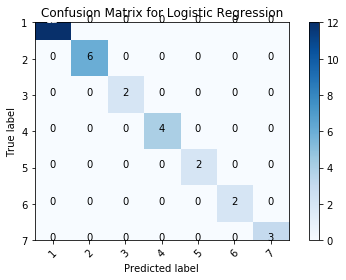

In [35]:
final_confusion_matrix(logreg_cf, Y, 'Logistic Regression')

In [36]:
logreg_residuals = y_test - y_hat
logreg_residuals[logreg_residuals!=0]

Series([], Name: class_type, dtype: int64)

## KNearestNeighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier()
model.fit(x_train, y_train)
Yhat_train = model.predict(x_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(x_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
print("Training Accuracy:",acc_train)
print("Test Accuracy:",acc_test)

cm_knn = confusion_matrix(y_test, Yhat_test)
print(cm_knn)

Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9032258064516129
[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]


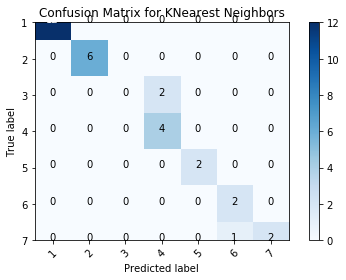

In [38]:
final_confusion_matrix(cm_knn,Y,'KNearest Neighbors')

## Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
y_pred_dt = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_dt_train))
print(accuracy_score(y_test, y_pred_dt))

[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
1.0
1.0


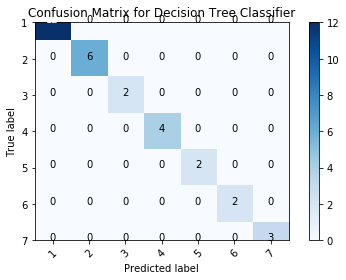

In [41]:
final_confusion_matrix(cm_dt,Y,'Decision Tree Classifier')

In [42]:
residuals_dt = y_pred_dt - y_test

In [43]:
residuals_dt[residuals_dt!=0]

Series([], Name: class_type, dtype: int64)

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [46]:
data_feature_names = list(X.columns)

In [47]:
dot_data = tree.export_graphviz(dt,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [48]:
y_train.value_counts()

1    29
2    14
4     9
7     7
6     6
3     3
5     2
Name: class_type, dtype: int64

In [49]:
class_data

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
4,5,4,Amphibian,"frog, frog, newt, toad"
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


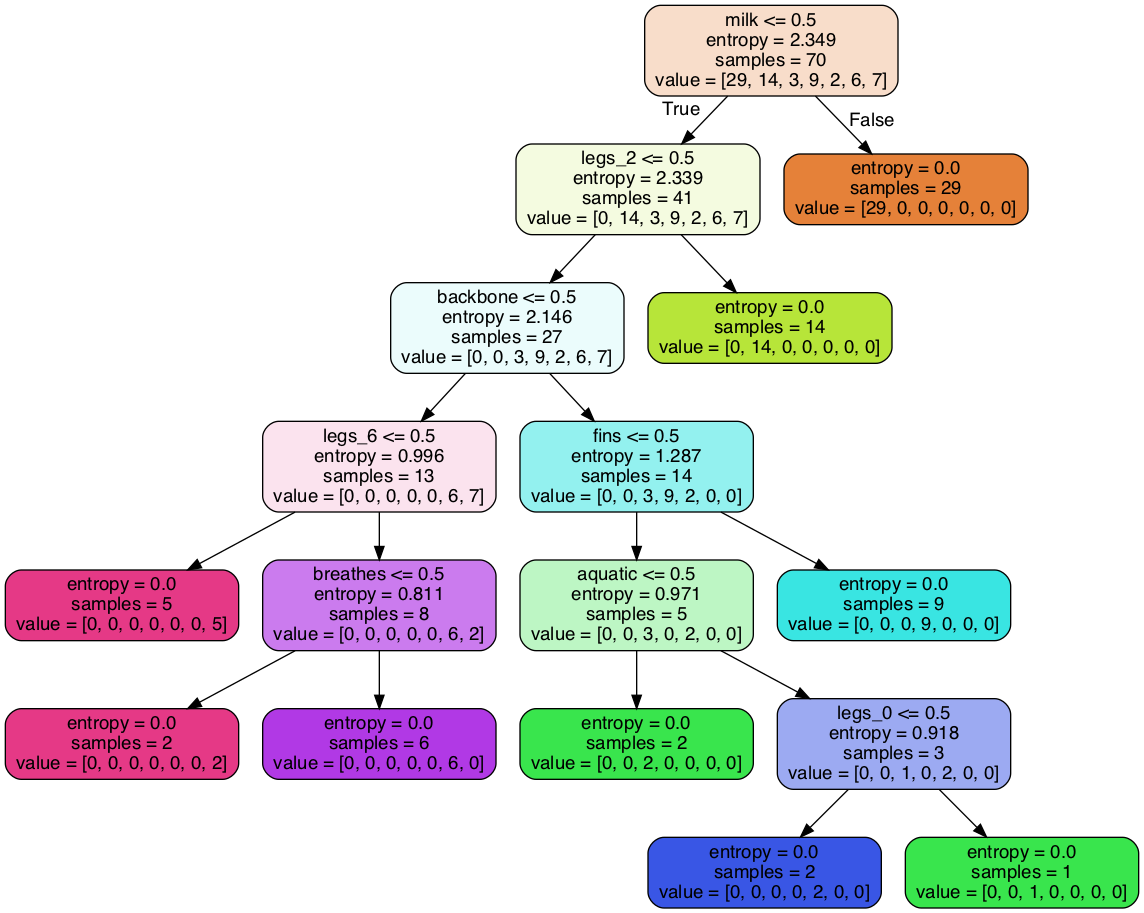

In [50]:
Image(graph.create_png())

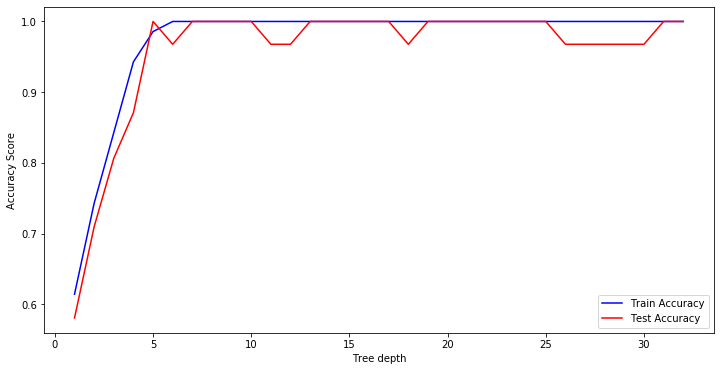

In [51]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

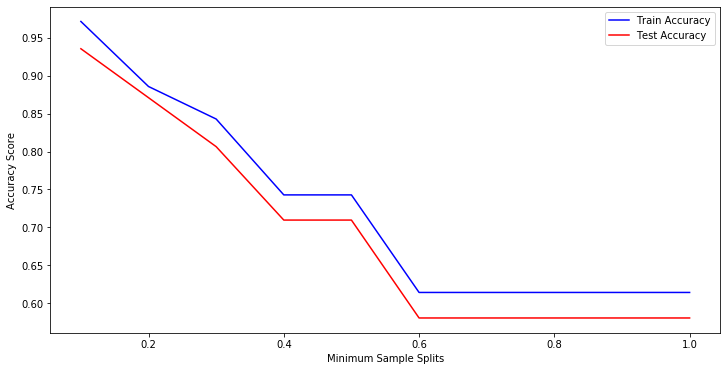

In [52]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_splits, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Minimum Sample Splits')
plt.legend()
plt.show()

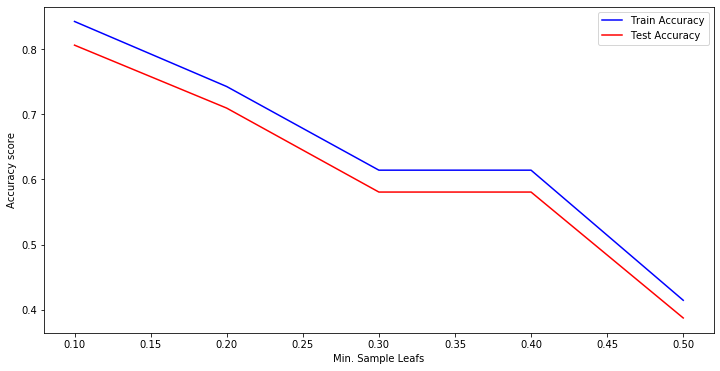

In [53]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

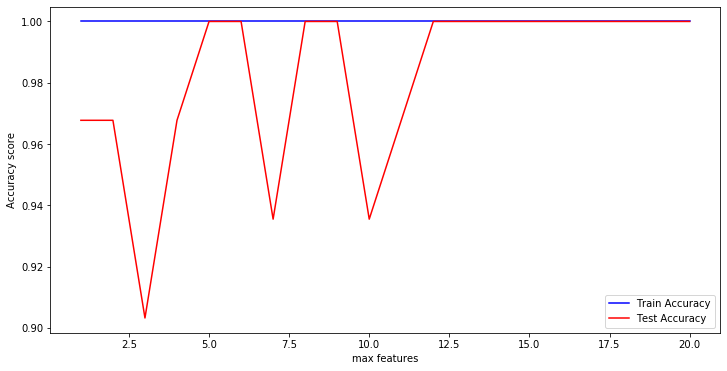

In [54]:
max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train Accuracy')
plt.plot(max_features, test_results, 'r', label='Test Accuracy')

plt.ylabel('Accuracy score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV, cross_val_score

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 30],
    'max_features': [None, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
}
dt_clf = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [56]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(x_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 99.86%
Mean Testing Score: 100.0%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy', 'max_depth': 8, 'max_features': 13}

In [57]:
y_hat_test_gs = dt_grid_search.predict(x_test)
y_hat_train_gs = dt_grid_search.predict(x_train)

residuals = y_train - y_hat_train_gs
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

residuals = y_test - y_hat_test_gs
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

cm_dt_gs = confusion_matrix(y_test, y_hat_test_gs)
print(cm_dt_gs)

70
1.0
31
1.0
[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


In [58]:
residuals[residuals!=0]

Series([], Name: class_type, dtype: int64)

In [59]:
dtgs = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=13)
dtgs.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
y_pred_dtgs = dtgs.predict(x_test)
y_pred_dtgs_train = dtgs.predict(x_train)

cm_dtgs = confusion_matrix(y_test, y_pred_dtgs)
print(cm_dtgs)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_dtgs_train))
print(accuracy_score(y_test, y_pred_dtgs))

[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
1.0
1.0


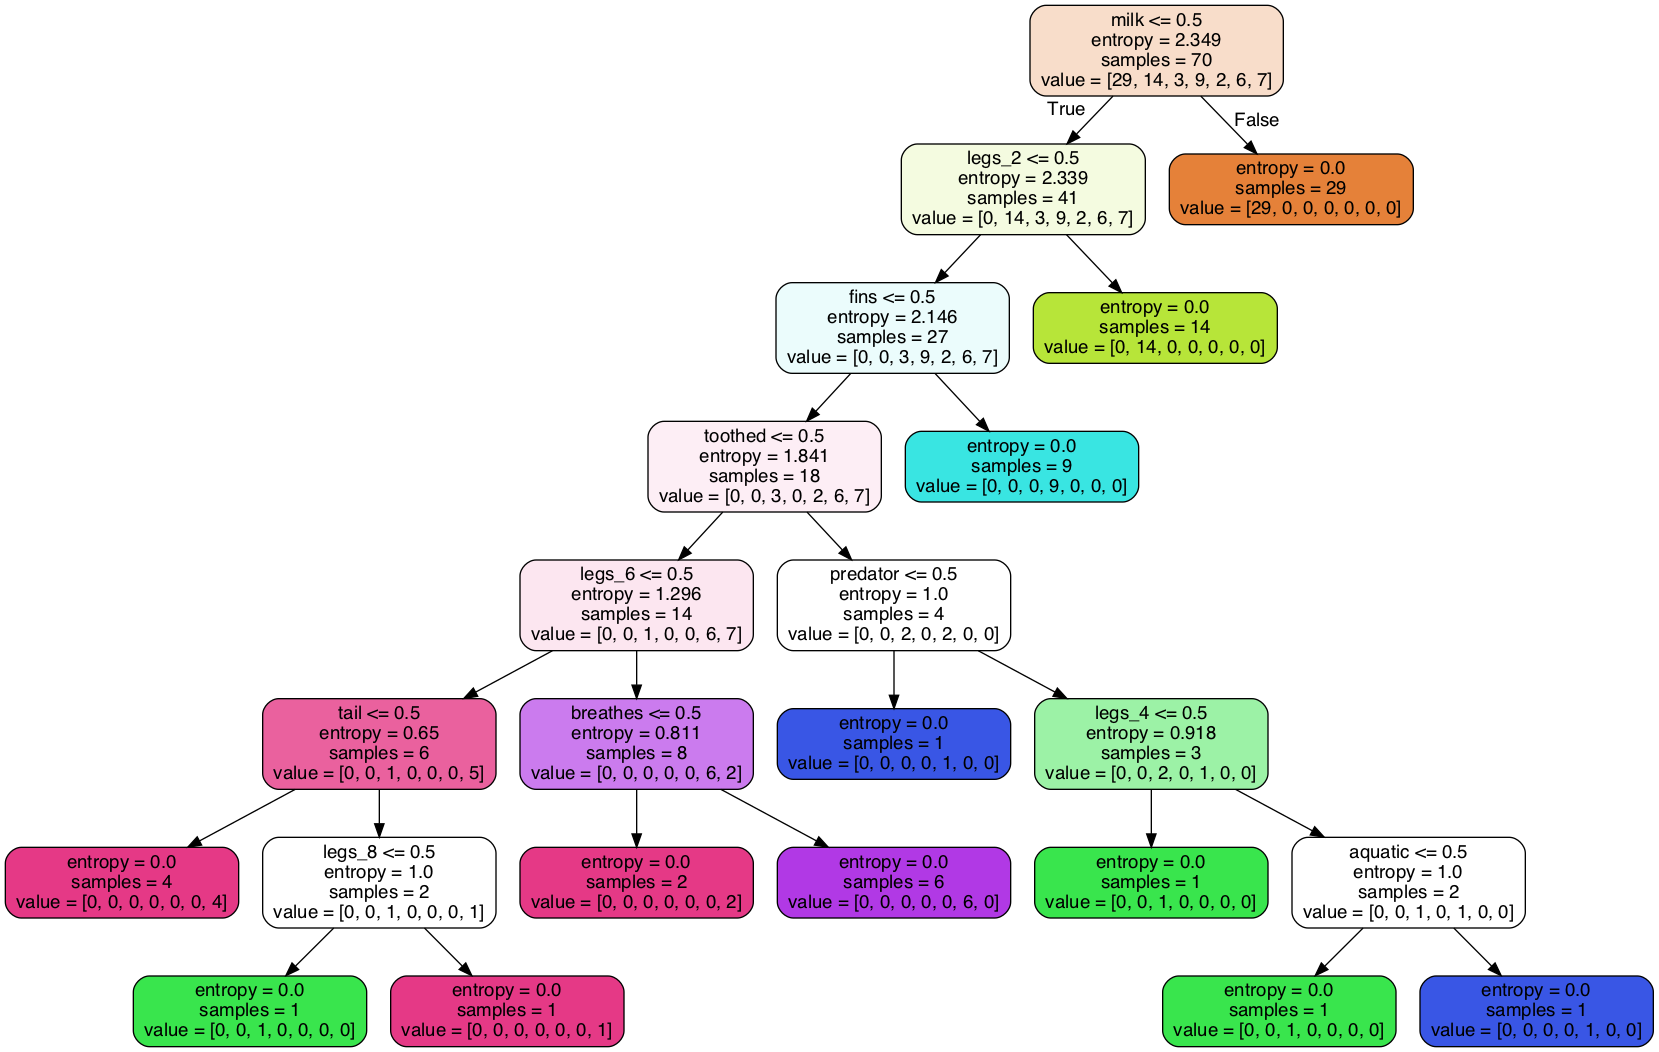

In [61]:
dot_data = tree.export_graphviz(dtgs,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## SVC

In [62]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_pred = svclassifier.predict(x_test)
svc_cm = confusion_matrix(y_test, y_pred)
print(svc_cm)
print(accuracy_score(y_test, y_pred))

[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
1.0


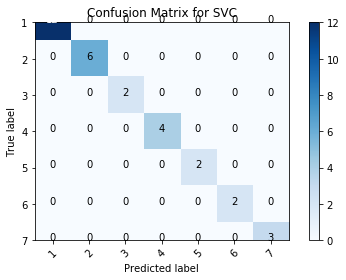

In [64]:
final_confusion_matrix(svc_cm, Y, 'SVC')

In [65]:
residuals_svc = y_test - y_pred
residuals_svc[residuals_svc!=0]

Series([], Name: class_type, dtype: int64)

## SVC with PCA Transformed Components

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)
pcatest_2d = pca.transform(x_test)

In [67]:
Y_train = list(y_train)

In [68]:
set(Y_train)

{1, 2, 3, 4, 5, 6, 7}

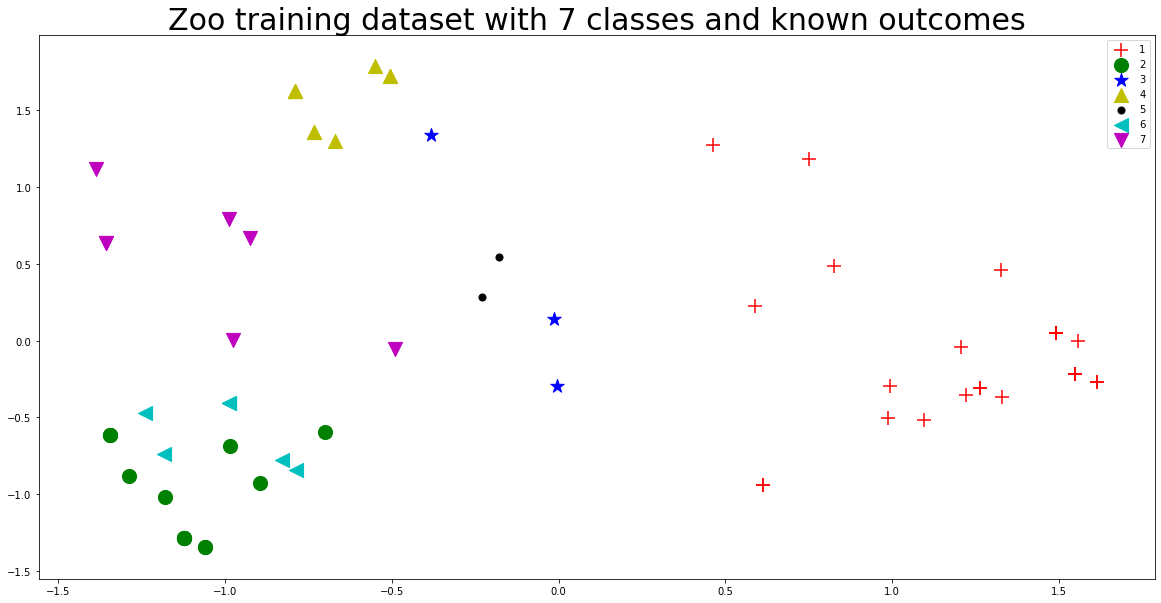

In [69]:
import pylab as pl
pl.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if Y_train[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', s=200, marker='+')
    elif Y_train[i] == 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',  s=200,  marker='o')
    elif Y_train[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',  s=200,  marker='*')
    elif Y_train[i] == 4:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',  s=200,  marker='^')
    elif Y_train[i] == 5:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='k',   s=200, marker='.')
    elif Y_train[i] == 6:
        c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',   s=200, marker='<')
    elif Y_train[i] == 7:
        c7 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m',  s=200,  marker='v')
pl.legend([c1, c2, c3, c4, c5, c6, c7], [1, 2, 3, 4, 5, 6, 7])
pl.title('Zoo training dataset with 7 classes and known outcomes',size=30)
pl.show()

In [70]:
svclassifier_pca = SVC(kernel='linear')
svclassifier_pca.fit(pca_2d, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
y_pred_pca = svclassifier_pca.predict(pcatest_2d)
svcpca_cm = confusion_matrix(y_test, y_pred_pca)
print(svcpca_cm)
print(accuracy_score(y_test, y_pred_pca))

[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  1  0  0  0  0  2]]
0.8387096774193549


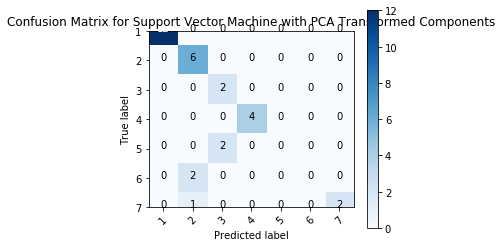

In [72]:
final_confusion_matrix(svcpca_cm, Y, 'Support Vector Machine with PCA Transformed Components')

In [73]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('+', 'o', '*', '^', '.', '<','v')
    colors = ('r', 'g', 'b', 'y', 'k', 'c', 'm')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(20,10))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl, s=200)
    plt.legend()

In [74]:
import warnings
warnings.simplefilter(action='ignore')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

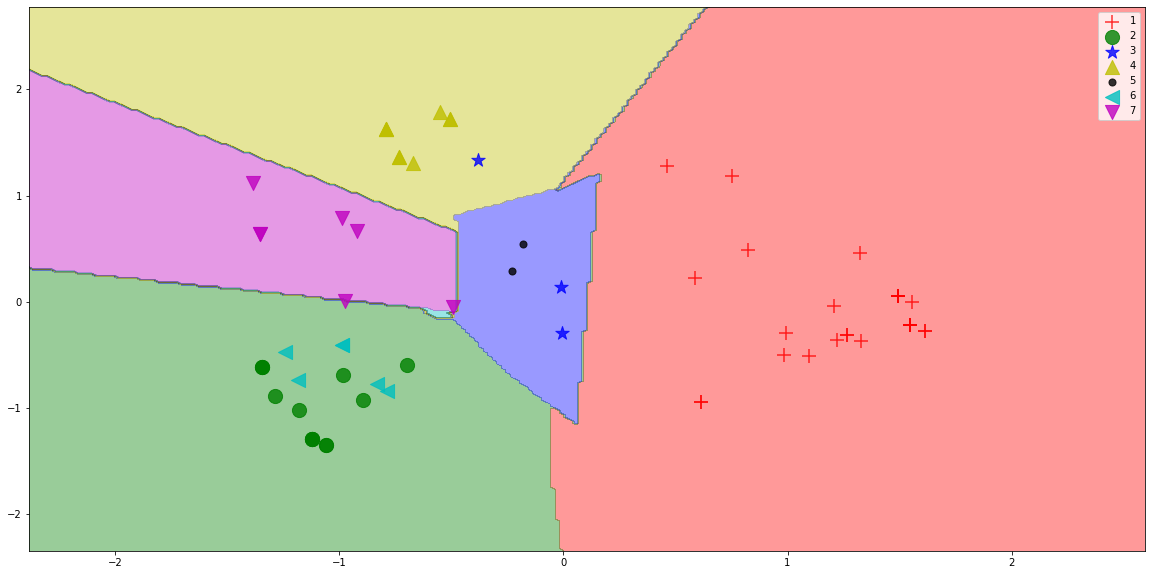

In [75]:
plot_decision_regions(pca_2d, Y_train, svclassifier_pca)

## Ensemble Methods

In [77]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(x_train, y_train)
print(bagged_tree.score(x_train, y_train))
print(bagged_tree.score(x_test, y_test))

bagged_cv_score = cross_val_score(bagged_tree, X, Y, cv=12)
mean_bagged_cv_score = np.mean(bagged_cv_score)

print("Mean Training Cross Validation Score: {:.4}%".format(mean_bagged_cv_score * 100))

0.9857142857142858
1.0
Mean Training Cross Validation Score: 95.14%


In [78]:
y_pred_bag = bagged_tree.predict(x_test)

In [79]:
bag_residuals = y_test - y_pred_bag
bag_residuals[bag_residuals!=0]

Series([], Name: class_type, dtype: int64)

In [80]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(x_train, y_train)

print(forest.score(x_train, y_train))
print(forest.score(x_test, y_test))

forest_cv_score = cross_val_score(forest, X, Y, cv=12)
mean_forest_cv_score = np.mean(forest_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_forest_cv_score * 100))

1.0
1.0
Mean Cross Validation Score: 97.11%


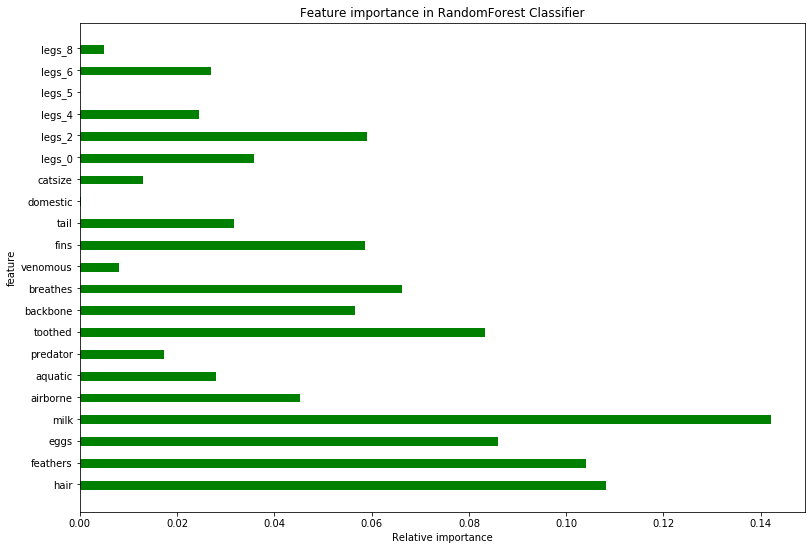

<Figure size 1440x1440 with 0 Axes>

In [81]:
col = list(x_train.columns)
#modelname.feature_importance_
y = forest.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(20,20))
fig.set_size_inches(13, 9, forward=True)